# Clean & Analyze Social Media

--- Original DataFrame Head (with some nulls and duplicates) ---
         Date             Category   Likes           State
0  2021-01-01  Bedroom and Bedding  3495.0    Portland, OR
1  2021-01-02            Recliners    54.0    Portland, OR
2  2021-01-03  Bedroom and Bedding  3891.0    Portland, OR
3  2021-01-04          Living Room  6113.0    Portland, OR
4  2021-01-05          Living Room  2932.0    Portland, OR
5  2021-01-06  Bedroom and Bedding  6096.0  Sacramento, CA
6  2021-01-01  Bedroom and Bedding  3495.0    Portland, OR
7  2021-01-07  Bedroom and Bedding  7713.0    Portland, OR
8  2021-01-08          Dining Room  1665.0    Portland, OR
9  2021-01-09          Living Room   665.0    Portland, OR
10 2021-01-10            Recliners  5889.0    Portland, OR
11 2021-01-11          Dining Room     NaN  Sacramento, CA
12 2021-01-12          Dining Room  8009.0    Portland, OR
13 2021-01-13          Dining Room  1462.0    Portland, OR
14 2021-01-14          Home Office  2746.0    Port

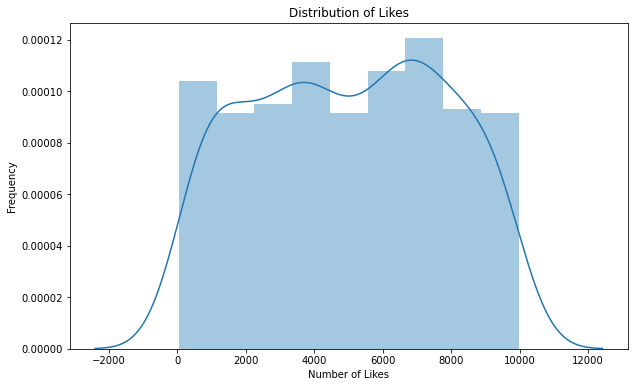

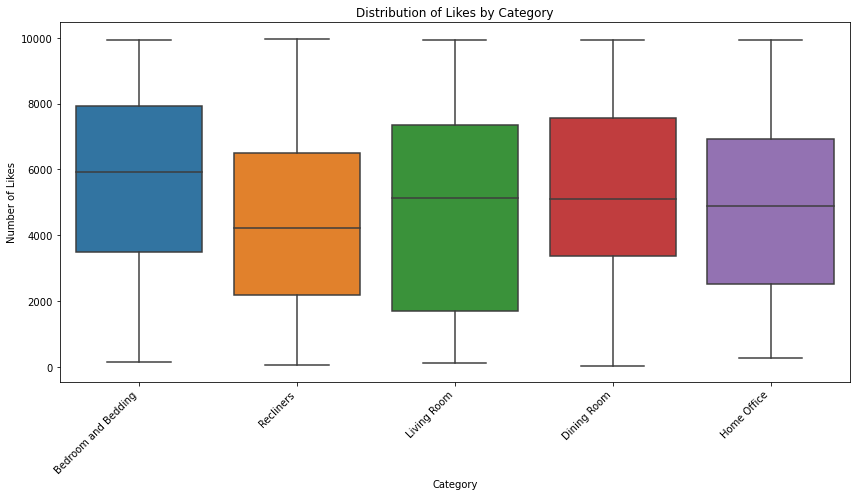

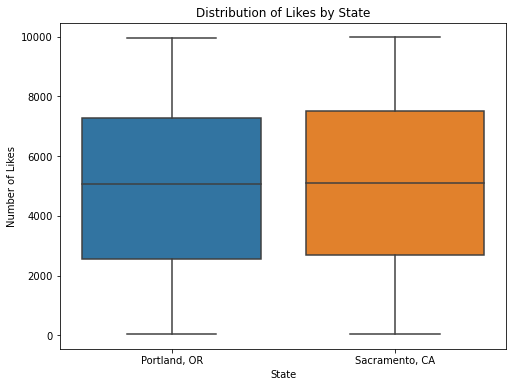

---  Analyzing Data (Statistics) ---
Mean of 'Likes': 4997.69


Mean of 'Likes' by Category:
Category
Bedroom and Bedding    5606.867925
Dining Room            5242.814815
Home Office            4720.153061
Living Room            4857.329787
Recliners              4434.888889
Name: Likes, dtype: float64


Mean of 'Likes' by State:
State
Portland, OR      5002.742647
Sacramento, CA    4991.562500
Name: Likes, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns # I'm importing seaborn for visualization
import matplotlib.pyplot as plt # I'm importing matplotlib for displaying plots

# My categories for the data
# I wanted it to reflect the industry that I work in
categories = ['Recliners', 'Living Room', 'Dining Room', 'Bedroom and Bedding', 'Home Office']

# My states for the new 'State' column
states = ['Portland, OR', 'Sacramento, CA']

# I'm generating the initial data as lists
dates = list(pd.date_range('2021-01-01', periods=500))
categories_data = [random.choice(categories) for _ in range(500)]
# I reverted 'Likes' back to integer generation using np.random.randint here.
# This caused a ValueError later when I tried to add np.nan to an integer column.
likes_data = np.random.randint(0, 10000, size=500)
# I'm generating data for the new 'State' column
states_data = [random.choice(states) for _ in range(500)]


smp_data_dictionary = {
    'data': {
        'Date': dates,
        'Category': categories_data,
        'Likes': likes_data,
        'State': states_data # I added the new 'State' data here
    }
}

# loading the data into a pandas DataFrame
# Pandas will likely infer 'Likes' as int64 at this point
df = pd.DataFrame(smp_data_dictionary['data'])

# --- Introducing artificial null values and duplicates for demonstration ---
# Introducing nulls *after* creating the DataFrame,
# which allows pandas to handle the type coercion (e.g., from int64 to float64 for Likes).
# This was a fix for the ValueError I got when trying to assign np.nan directly to an integer array.

# Introducing NaN in 'Likes'
# Assigning np.nan to an integer column will automatically convert it to float64
df.loc[10, 'Likes'] = np.nan

# Introducing None in 'Category'
df.loc[20, 'Category'] = None

# Introducing NaT in 'Date'
df.loc[30, 'Date'] = pd.NaT

# Introducing None in 'State' for demonstration of null handling
df.loc[40, 'State'] = None


# duplicating a row by using pandas methods
# duplicating the 0th row and appending it
duplicated_row_1 = df.iloc[0].copy()
df = pd.concat([df.iloc[:6], pd.DataFrame([duplicated_row_1]), df.iloc[6:]]).reset_index(drop=True)

# duplicating another row (the one with NaNs at original index 10, now shifted)
# I need to find the new index of the row that was originally at index 10
# After inserting one row at index 6, the row originally at 10 is now at 11
duplicated_row_2 = df.iloc[11].copy()
df = pd.concat([df.iloc[:16], pd.DataFrame([duplicated_row_2]), df.iloc[16:]]).reset_index(drop=True)


print("--- Original DataFrame Head (with some nulls and duplicates) ---")
print(df.head(20)) # printing more rows to show inserted duplicates and nulls
print("\n")

print("--- Original DataFrame Info ---")
df.info()
print("\n")

# --- Type Conversion ---

# converting the 'Date' field to datetime format using pd.to_datetime
# This is good practice even if pandas infers it correctly, ensuring the dtype.
df['Date'] = pd.to_datetime(df['Date'])

# converting the 'Likes' data to an integer.
# Since I introduced NaNs, a standard int64 won't work.
# I'm using the nullable integer type 'Int64' which can handle NaNs.
df['Likes'] = df['Likes'].astype('Int64')

# 'State' is an object/string type, no specific conversion needed unless required


print("--- DataFrame Info After Type Conversion ---")
df.info()
print("\n")

print("--- DataFrame Head After Type Conversion ---")
print(df.head(20)) # printing head again to see effects of type conversion and inserted rows
print("\n")


# --- Data Cleaning ---

### removing Null Values
# Now that types are handled, I can drop nulls.
# dropna() will remove rows with NaT in 'Date', None in 'Category', None in 'State' and NaN in 'Likes'.
df_no_nulls = df.dropna()

print("--- DataFrame after dropping nulls (df_no_nulls) ---")
print(df_no_nulls.head())
print("\n")
print("--- Info after dropping nulls ---")
df_no_nulls.info()
print("\n")


### removing Duplicate Rows
# removing any duplicate rows from the DataFrame.
# applying this to the DataFrame after nulls are dropped.
df_no_duplicates = df_no_nulls.drop_duplicates()

print("--- DataFrame after dropping duplicates (df_no_duplicates) ---")
print(df_no_duplicates.head())
print("\n")
print("--- Info after dropping duplicates ---")
df_no_duplicates.info()
print("\n")

#  printing the count of each 'Category' element for the cleaned DataFrame
print("--- Count of each 'Category' element in the cleaned DataFrame ---")
print(df_no_duplicates['Category'].value_counts())

# printing the count of each 'State'
print("\n--- Count of each 'State' element in the cleaned DataFrame ---")
print(df_no_duplicates['State'].value_counts())


# --- Data Visualization ---

print("--- I'm Visualizing Data ---")

# creating a histogram of the 'Likes' using sns.distplot (compatible with older seaborn versions)
# I changed from sns.histplot to sns.distplot because I got an AttributeError,
# indicating that histplot was not available in the current seaborn version.
plt.figure(figsize=(10, 6)) # I'm setting the figure size
# Note: sns.distplot combines histogram and KDE plot.
# pass the Series directly for older versions.
sns.distplot(a=df_no_duplicates['Likes'], kde=True)
plt.title('Distribution of Likes') # adding a title
plt.xlabel('Number of Likes') #  adding x-axis label
plt.ylabel('Frequency') # adding y-axis label
plt.show() #  displaying the plot

#  creating a boxplot of 'Likes' by 'Category'
plt.figure(figsize=(12, 7)) #  setting the figure size
sns.boxplot(data=df_no_duplicates, x='Category', y='Likes') #using the cleaned data
plt.title('Distribution of Likes by Category') # I adding a title
plt.xlabel('Category') # adding x-axis label
plt.ylabel('Number of Likes') #  adding y-axis label
plt.xticks(rotation=45, ha='right') # I rotating x-axis labels for better readability
plt.tight_layout() # adjusting layout to prevent labels overlapping
plt.show() # displaying the plot

# Optional: visualizing Likes by State (e.g., using a boxplot or bar plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='State', y='Likes')
plt.title('Distribution of Likes by State')
plt.xlabel('State')
plt.ylabel('Number of Likes')
plt.show()


# --- Data Analysis (Statistics) ---

print("---  Analyzing Data (Statistics) ---")

# computing and printing the mean of the 'Likes' column
mean_likes = df_no_duplicates['Likes'].mean()
print(f"Mean of 'Likes': {mean_likes:.2f}") # I'm formatting to 2 decimal places
print("\n")

# computing and printing the mean of 'Likes' for each 'Category'
mean_likes_by_category = df_no_duplicates.groupby('Category')['Likes'].mean()
print("Mean of 'Likes' by Category:")
print(mean_likes_by_category)
print("\n")

# computing and printing the mean of 'Likes' for each 'State'
mean_likes_by_state = df_no_duplicates.groupby('State')['Likes'].mean()
print("Mean of 'Likes' by State:")
print(mean_likes_by_state)


## IntroductionSocial media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## PrerequisitesTo follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:- pandas- Matplotlib...These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:```python!pip install pandas!pip install matplotlib```

## Project ScopeThe objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required LibrariesAs the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.